In [9]:
#1 Split the data into a training and test set:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
filepath = 'C:/Users/Kyle/Documents/Data Science (DSC550)/5.2 Exercise/labeledTrainData.tsv'
df = pd.read_csv(filepath, sep='\t')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [10]:
#2. Fit and apply the tf-idf vectorization to the training set:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)

In [11]:
#3. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?)
X_test_transformed = vectorizer.transform(X_test)

In [12]:
#4 Train a logistic regression using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_transformed, y_train)

LogisticRegression(random_state=42)

In [13]:
#5 Find the model accuracy on test set
y_pred = lr.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.89


In [14]:
#6 Create a confusion matrix for the test set predictions
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[2173  308]
 [ 248 2271]]


In [15]:
#7 Get the precision, recall, and F1-score for the test set predictions
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2481
           1       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



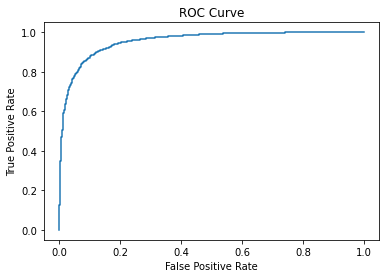

In [16]:
#8 Create a ROC curve for the test set
y_pred_prob = lr.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Model Accuracy (Random Forest Classifier): 0.86
Confusion Matrix (Random Forest Classifier):
[[2130  351]
 [ 365 2154]]
Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2481
           1       0.86      0.86      0.86      2519

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



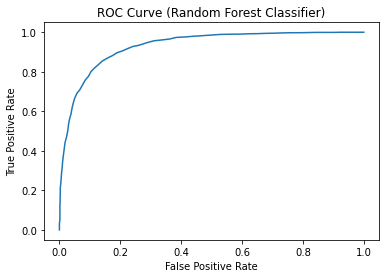

In [17]:
#9 Pick another classification model you learned about this week and repeat steps (5) – (9)
#1 Using a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#2 Train a random forest classifier using the training data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_transformed, y_train)

#3 Find the model accuracy on test set
y_pred = rfc.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Random Forest Classifier): {accuracy:.2f}")

#4 Create a confusion matrix for the test set predictions
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix (Random Forest Classifier):\n{cm}")

#5 Get the precision, recall, and F1-score for the test set predictions
report = classification_report(y_test, y_pred)
print(f"Classification Report (Random Forest Classifier):\n{report}")

#6 Create a ROC curve for the test set
y_pred_prob = rfc.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest Classifier)")
plt.show()